<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **06. DATA ANALYSIS: STATISTIC TO DISCRIMINATE CLASSES** </center>



## **Outline**
1. **Discriminating/classify from variable modelling**
2. **CLT-again discr**






In [ ]:
#@title *Execute this cell*
#@markdown Please include your student id
import sys
import inspect

group_id = "DA-20231-Laconga" #@param {type:"string"}
assignment_id = group_id +'.20221.python'
code_subject = '5'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name', 'course_name', 'student_id'])
config = Config(server_name='https://azuregrader.azurewebsites.net/api', 
                course_name='ai1', student_id='2162107')


def check_solution(assignment_id, student_func_str):

    # Set the endpoint and payload.
    payload = {'func_str': student_func_str, 'assignment_id': assignment_id}
    endpoint_url = config.server_name + '/CheckSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.get(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "course-AI/ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-AI/ai-uis-student


In [1]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_theme()
pd.__version__

'1.3.5'

#**1. Discriminating/classify from variable modelling**

we can obtain a dataset of a set of patients diagnosed with breast cancer and control patients. Each patient is characterized by an histological analysis, by measuring geometrical properties in the nuclei. See an image example of sample, where nuclei is characterized: 


<center> <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/imagenBreast.jpg" width="240" > </center>

We going to load a related dataset, and then we going to analyze with statistical tools. 

In [ ]:
#@title **code**
data_breast = pd.read_csv('data/breast_cancer.csv')
data_breast.diagnosis.replace(to_replace='M', value=1, inplace=True)
data_breast.diagnosis.replace(to_replace='B', value=0, inplace=True)
print(data_breast.shape)
data_breast = data_breast.sample(frac=1)

data_breast.head(10)

(569, 33)


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
83   8611792          1       19.100         26.29          129.10     1132.0   
340    89813          0       14.420         16.54           94.15      641.2   
110   864033          0        9.777         16.99           62.50      290.2   
40    855167          1       13.440         21.58           86.18      563.0   
291     8915          0       14.960         19.10           97.03      687.3   
448   911150          0       14.530         19.34           94.25      659.7   
540   921385          0       11.540         14.44           74.65      402.9   
499    91485          1       20.590         21.24          137.80     1320.0   
207   879830          1       17.010         20.26          109.70      904.3   
133   867387          0       15.710         13.93          102.00      761.7   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
83           0.12150           0.17910         0.19370              0.14690   
340          0.09751           0.11390         0.08007              0.04223   
110          0.10370           0.08404         0.04334              0.01778   
40           0.08162           0.06031         0.03110              0.02031   
291          0.08992           0.09823         0.05940              0.04819   
448          0.08388           0.07800         0.08817              0.02925   
540          0.09984           0.11200         0.06737              0.02594   
499          0.10850           0.16440         0.21880              0.11210   
207          0.08772           0.07304         0.06950              0.05390   
133          0.09462           0.09462         0.07135              0.05933   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
83   ...          32.72           141.30      1298.0            0.1392   
340  ...          21.51           111.40       862.1            0.1294   
110  ...          21.47            71.68       367.0            0.1467   
40   ...          30.25           102.50       787.9            0.1094   
291  ...          26.19           109.10       809.8            0.1313   
448  ...          28.39           108.10       830.5            0.1089   
540  ...          19.68            78.78       457.8            0.1345   
499  ...          30.76           163.20      1760.0            0.1464   
207  ...          25.05           130.00      1210.0            0.1111   
133  ...          19.25           114.30       922.8            0.1223   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
83              0.2817           0.2432               0.18410          0.2311   
340             0.3371           0.3755               0.14140          0.3053   
110             0.1765           0.1300               0.05334          0.2533   
40              0.2043           0.2085               0.11120          0.2994   
291             0.3030           0.1804               0.14890          0.2962   
448             0.2649           0.3779               0.09594          0.2471   
540             0.2118           0.1797               0.06918          0.2329   
499             0.3597           0.5179               0.21130          0.2480   
207             0.1486           0.1932               0.10960          0.3275   
133             0.1949           0.1709               0.13740          0.2723   

     fractal_dimension_worst  Unnamed: 32  
83                   0.09203          NaN  
340                  0.08764          NaN  
110                  0.08468          NaN  
40                   0.07146          NaN  
291                  0.08472          NaN  
448                  0.07463          NaN  
540                  0.08134          NaN  
499                  0.08999          NaN  
207                  0.06469          NaN  
133                  0.07071          NaN  

[10 rows x 33 columns]

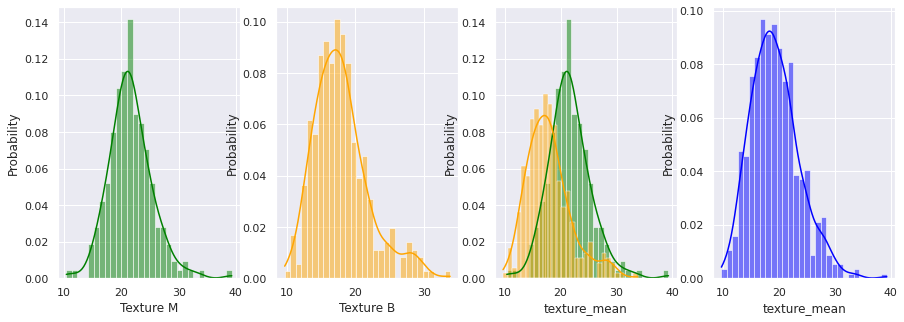

In [ ]:
#@title **code:** do these distributions look familiar?
plt.figure(figsize=(15,5))
plt.subplot(1,4, 1);
ax=sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], kde=True, color='green', bins=30, stat='probability');
ax.set(xlabel="Texture M")
plt.subplot(1,4, 2);
ax=sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==0], kde=True, color='orange', bins=30, stat='probability');
ax.set(xlabel="Texture B")
plt.subplot(1,4, 3);
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], kde=True, color='green', bins=30, stat='probability');
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==0], kde=True, color='orange', bins=30, stat='probability');
plt.subplot(1,4, 4);
sns.histplot(data_breast.texture_mean, kde=True, color='blue', bins=30, stat='probability');


<AxesSubplot:>

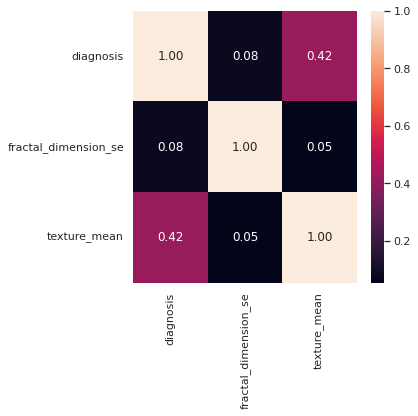

In [ ]:
#@title **code** we can compute the correlation  
#@markdown  we can compute analytically correlations
plt.subplots(figsize=(5,5)) #Importante para que se vean todas las correlaciones
corr = data_breast[['diagnosis', 'fractal_dimension_se', 'texture_mean']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

In [ ]:
#@markdown **full correlation**
plt.subplots(figsize=(25,15)) 
corr = data_breast.corr()
sns.heatmap(corr, annot=True, fmt=".2f")



From distribution we can answer ans understand population patterns. Such patterns can be codified and evolved in computational tools to support decisions, process, among many others. For instance, in medical aplications, this analysis are the core for **computer aided diagnosis (CADS)**:     


<center> <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/cads.png" width="400" > </center>


For instance, Observe next distribution of a particular variable. Can we use this information to support diagnosis?

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_se'>

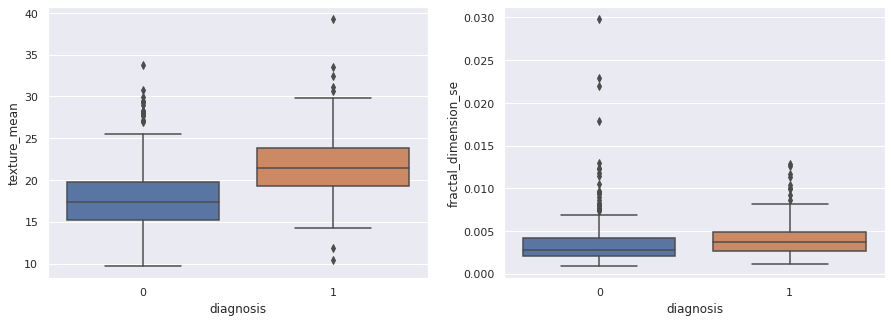

In [ ]:
#@title **code** Can you support diagnosis from such variables?
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="texture_mean", data=data_breast)
plt.subplot(1,2,2)
sns.boxplot(x="diagnosis", y="fractal_dimension_se", data=data_breast)

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_se'>

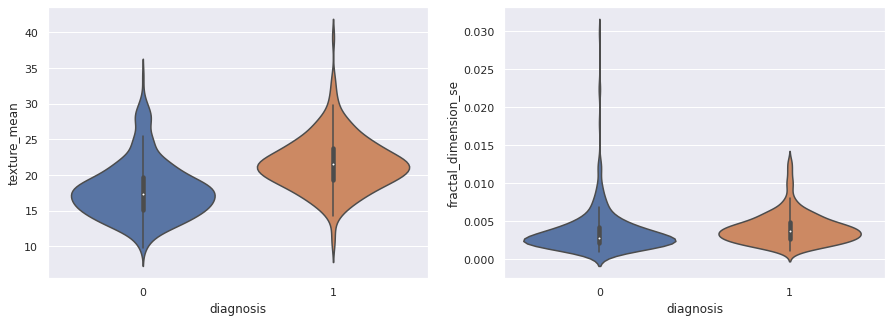

In [ ]:
#@title **code**  We can better analyze from violinplots!
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(x="diagnosis", y="texture_mean", data=data_breast)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="fractal_dimension_se", data=data_breast)

We can "simply" compute pdf and cdf and to _"code a rule"_ to decide if the sample belongs to a malignant or benign diagnosis. 

- Suppose that we have the result of a patient with texture mean of = 17.43. (patient id 246). From this result which class correspond?

- Suppose that we have the result of a patient with texture mean of = 22.91. (patient id 118). From this result which class correspond?


**which class (bening or malignant) do you think they belong to? with what probability?**

In [ ]:
#@title  **code**

import numpy as np
import scipy.stats as stats

index_benign = 246 #@param {type:"integer"}
index_malign = 118 #@param {type:"integer"}

gt_diag_B = data_breast.diagnosis[index_benign]
t_b_sample = data_breast.texture_mean[index_benign]
t_m_sample = data_breast.texture_mean[index_malign]
gt_diag_M =  data_breast.diagnosis[index_malign]


text_m = data_breast.texture_mean[data_breast.diagnosis ==1]
text_b   = data_breast.texture_mean[data_breast.diagnosis ==0]
text_m_dis =  stats.norm(loc=np.mean(text_m), scale=np.std(text_m))
text_b_dis =  stats.norm(loc=np.mean(text_b), scale=np.std(text_b))
lower_bound = text_m_dis.ppf(0.01); upper_bound = text_m_dis.ppf(0.99)
x, tx_M_cont = np.linspace(lower_bound, upper_bound, 100, retstep=True)
lb = text_b_dis.ppf(0.01); ub = text_b_dis.ppf(0.99)
xb, tx_B_cont = np.linspace(lb, ub, 100, retstep=True)
print('sum 1 the prob', np.sum(tx_M_cont*text_m_dis.pdf(x)))
print('sum 1 the prob', np.sum(tx_B_cont*text_b_dis.pdf(xb)))

def classification_from_stat(text_sample):
  est_b = tx_B_cont*text_b_dis.pdf(text_sample)
  est_m = tx_M_cont*text_m_dis.pdf(text_sample)
  print('est_b: ', est_b, 'est_m: ', est_m)
  class_est = 0 if est_b>est_m else  1
  return class_est


# first classification example
print("estimated class: ", classification_from_stat(t_b_sample), "the ground truth: ", gt_diag_B)

# second classification example
print("estimated class: ", classification_from_stat(t_m_sample), "the ground truth: ", gt_diag_M)

sum 1 the prob 0.9812297466603901
sum 1 the prob 0.9812297466603902
est_b:  0.018611161840577265 est_m:  0.010156881616526328
estimated class:  0 the ground truth:  0
est_b:  0.008561548388982982 est_m:  0.01765892128235922
estimated class:  1 the ground truth:  1


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

We can do the same with the fractal variable. 
- Code a function that compute the prediction of diagnosis class, according to the larger probability with respect to the malignant and benign distributions of `fractal_dimension_se`

** How confident are these results?

In [ ]:
#@title **code student**

#@title **code professor**

index_benign = 246 #@param {type:"integer"}
index_malign = 118 #@param {type:"integer"}

gt_diag_B = data_breast.diagnosis[index_benign]
t_b_sample = data_breast.fractal_dimension_se[index_benign]
t_m_sample = data_breast.fractal_dimension_se[index_malign]
gt_diag_M =  data_breast.diagnosis[index_malign]

def classification_from_stat(text_sample):
  import numpy as np
  import scipy.stats as stats
  data_breast = pd.read_csv('data/breast_cancer.csv')
  data_breast.diagnosis.replace(to_replace='M', value=1, inplace=True)
  data_breast.diagnosis.replace(to_replace='B', value=0, inplace=True)
  
  data_breast = data_breast.sample(frac=1)








  return class_est

# first classification example
print("estimated class: ", classification_from_stat(t_b_sample), "the ground truth: ", gt_diag_B)

# second classification example
print("estimated class: ", classification_from_stat(t_m_sample), "the ground truth: ", gt_diag_M)

# **2.Central Limit Theorem (CLT)**


How much the original breast cancer data belongs to a normal distributions?

- We can run an experiment with multiple samples, to observe how distribution of the mean is approximated to a **Gaussian distribution**

- We need to take some theretical but useful things!!...
- We need to know which means the  **mean**: the expected value
- Then we compute the distribution of multiple means: **The CLT**
- Wewill know about `iid` referred to as independent and identically distributed


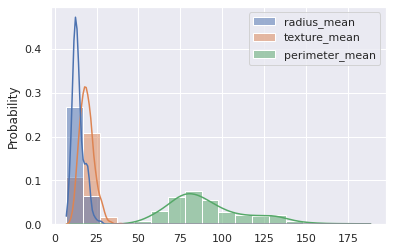

In [ ]:
#@title **code**
subset_variables = list(data_breast.columns)[2:5]
sns.histplot(data=data_breast[subset_variables], kde=True,stat='probability')

### **2.2 Central Limit Theorem**

The probability distribution of the mean of i.i.d random variables with finite variance is close to a **normal distribution** the the population size increase. 

A summary to proof central limit theorem is: 

1. Take a sample of size N=2 from any distribution
2. Compute the **sample mean**
3. Repeat 100 times

4. Plot the distribution of the **sample mean**
5. Repeat for N=4,10,30

**Agregations of i.i.d. random variables are distributed as a Gaussian**:

$$\frac{X_1 + X_2 + ... + X_N}{N} \sim \mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$$

**i.i.d** if each random variable has the same distribution and all of them are mutually independent.

The central limit theorem allows us use statistics of samples without know about particular shape distribution of the population. 

See an example to built a Gaussian distribution from a Poisson distribution

Now...
We can built an estimation of a Gaussian distribution of the mean experiments for our variable malingnant of interest. 

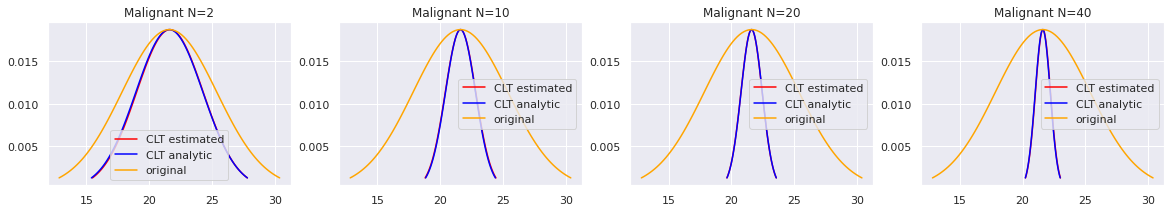

In [ ]:
#@title **code**
plt.figure(figsize=(20,3))
text_m = data_breast.texture_mean[data_breast.diagnosis ==1]
text_b   = data_breast.texture_mean[data_breast.diagnosis ==0]
d_mean = np.mean(text_m)
d_std  = np.std(text_m)

for i,N in enumerate([2,10,20, 40]):
  sample_means_m = []
  sample_means_m = np.r_[[np.mean(np.random.choice(text_m, size=N)) for _ in range(10000)]]

  plt.subplot(1,4,i+1)

  estimat_c = stats.norm(loc=np.mean(sample_means_m), scale=np.std(sample_means_m))
  x_ref_estim, ref_cont_estim = np.linspace(estimat_c.ppf(0.01), estimat_c.ppf(0.99), 100, retstep=True)
  plt.plot(x_ref_estim, ref_cont_estim*estimat_c.pdf(x_ref_estim), label="CLT estimated", color="red")


  analyt_c = stats.norm(loc=d_mean, scale=d_std/np.sqrt(N))
  x_ref_analy, ref_cont_analy = np.linspace(analyt_c.ppf(0.01), analyt_c.ppf(0.99), 100, retstep=True)
  plt.plot(x_ref_analy, ref_cont_analy*analyt_c.pdf(x_ref_analy), label="CLT analytic", color="blue")


  
  plt.title("Malignant N=%d"%N)  
  plt.legend()



 <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Create Gaussian distribution of means for Malignant and bening fractal distributions

In [ ]:
#@title  **code student**



---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
